In [17]:
import json
import glob 


import pandas
import seaborn

import statsmodels
import statsmodels.stats
import statsmodels.stats.descriptivestats

import statsmodels.multivariate
import statsmodels.multivariate.pca
import statsmodels.multivariate.factor


In [18]:
pandas.set_option('display.float_format', lambda x: f'{x:,.6f}')

In [19]:
MODEL: str = "llama3.3-70b"

In [20]:
raw: pandas.DataFrame = pandas.concat(
    [
        pandas.json_normalize(json.load(open(file))).assign(participant=n)
        for n, file in enumerate(glob.glob(f"data/base/{MODEL}/*.json", recursive=True))
    ],
)

In [21]:
pivoted: pandas.DataFrame = (
    raw
    .pipe(lambda _df: _df.assign(response=pandas.to_numeric(_df["response"], errors='coerce')))
    .pivot_table(
        values="response",
        index="participant",
        columns="dimension",
        aggfunc="mean"
    )
)
pivoted

dimension,authority,care,equality,loyalty,proportionality,purity
participant,,,,,,
0,2.000000,1.000000,1.833333,1.166667,1.333333,2.666667
1,2.000000,1.000000,1.833333,1.333333,1.333333,2.833333
2,2.000000,1.000000,1.833333,1.333333,1.333333,3.000000
3,2.000000,1.000000,1.833333,1.333333,1.333333,2.833333
4,2.000000,1.000000,1.833333,1.333333,1.333333,2.833333
...,...,...,...,...,...,...
245,2.000000,1.000000,1.833333,1.333333,1.166667,3.166667
246,2.000000,1.000000,1.833333,1.166667,1.333333,3.000000
247,2.000000,1.000000,1.833333,1.166667,1.166667,2.833333


In [22]:
pivoted.describe()

dimension,authority,care,equality,loyalty,proportionality,purity
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2.000000,1.000000,1.834667,1.290000,1.326000,2.850000
std,0.000000,0.000000,0.014877,0.092139,0.034251,0.114976
min,2.000000,1.000000,1.833333,1.166667,1.166667,2.500000
25%,2.000000,1.000000,1.833333,1.166667,1.333333,2.833333
50%,2.000000,1.000000,1.833333,1.333333,1.333333,2.833333
75%,2.000000,1.000000,1.833333,1.333333,1.333333,2.833333
max,2.000000,1.000000,2.000000,1.666667,1.333333,3.166667


In [23]:
statsmodels.stats.descriptivestats.describe(pivoted)

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)


dimension,authority,care,equality,loyalty,proportionality,purity
nobs,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
missing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,2.000000,1.000000,1.834667,1.290000,1.326000,2.850000
std_err,0.000000,0.000000,0.000941,0.005827,0.002166,0.007272
upper_ci,2.000000,1.000000,1.836511,1.301421,1.330246,2.864252
lower_ci,2.000000,1.000000,1.832823,1.278579,1.321754,2.835748
std,0.000000,0.000000,0.014877,0.092139,0.034251,0.114976
iqr,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
iqr_normal,0.000000,0.000000,0.000000,0.123550,0.000000,0.000000
mad,0.000000,0.000000,0.002645,0.076960,0.014021,0.078800


In [24]:
statsmodels.multivariate.pca.PCA(pivoted, missing="drop-row").plot_rsquare(ncomp=36)

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/statsmodels/multivariate/pca.py:424: RuntimeWarning: invalid value encountered in divide
  data = (adj_data - self._mu) / self._sigma


LinAlgError: SVD did not converge

In [25]:
statsmodels.multivariate.factor.Factor(pivoted, n_factor=6).fit().plot_scree()

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


LinAlgError: SVD did not converge

In [26]:
print(
    pivoted
    .round(1)
    .to_csv(index=False, na_rep="NA")
)

authority,care,equality,loyalty,proportionality,purity
2.0,1.0,1.8,1.2,1.3,2.7
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.3,1.3,3.0
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.2,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.2,1.3,2.8
2.0,1.0,1.8,1.2,1.3,2.8
2.0,1.0,1.8,1.2,1.3,2.8
2.0,1.0,1.8,1.2,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.7
2.0,1.0,1.8,1.2,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.2,1.3,3.0
2.0,1.0,1.8,1.5,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.2,1.3,2.5
2.0,1.0,1.8,1.2,1.3,3.0
2.0,1.0,1.8,1.2,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.3,1.3,2.8
2.0,1.0,1.8,1.2,1.3,2.8
2.0,1.0,1.8,1.2,1.3,2.8
2.0,1.0,1.8,1.3,1.3,3.0
2.0,1.0,1.8,1.2,1.3,2.7
2.0,1.0,1.8,1.5,1.3,2.7
2.0,1.0,1.8,1.3,1.3,3.0
2.0,1.0,1.8,1.2,1.3,2.8
2.0,1.0,1

<Axes: xlabel='variable', ylabel='value'>

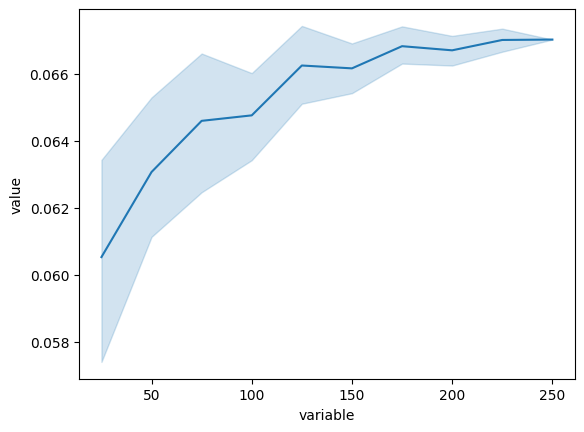

In [27]:
seaborn.lineplot(
    (
        pandas.DataFrame({
            n: [
                (
                    raw
                    .groupby("id")
                    .sample(n)
                    .pivot_table(
                        values="response",
                        columns="id",
                        aggfunc="std"
                    )
                    .T
                    .mean()
                ).values[0]
            for _ in range(25)
            ]
            for n in range(25, 251, 25)
        })
        .melt()
    ),
    x="variable",
    y="value"
)